## Downloading and viewing the current HWRF data

In [1]:
from ipywidgets import *

import numpy as np
import pygrib
import matplotlib.pyplot as plt
import datetime
from mpl_toolkits.basemap import Basemap, shiftgrid

import urllib2, urllib

In [2]:
%matplotlib notebook

In [3]:
# evaluate path based on date
today=datetime.datetime.today()
date=datetime.datetime.strftime(today,'%Y%m%d')

In [4]:
#We have to options for the hour 
hh=['00','12']

In [5]:
try:
 url='http://nomads.ncep.noaa.gov/pub/data/nccf/com/hur/prod/hwrf.{}/'.format(date+hh[1])
 response=urllib2.urlopen(url)
except:
 url='http://nomads.ncep.noaa.gov/pub/data/nccf/com/hur/prod/hwrf.{}/'.format(date+hh[0])
 response=urllib2.urlopen(url)

print url

http://nomads.ncep.noaa.gov/pub/data/nccf/com/hur/prod/hwrf.2016062000/


In [6]:
ls=response.readlines()

In [7]:
lp=[elem.strip().split('href=')  for elem in ls]
n=np.size(lp)

In [8]:
cname=[]
for i in range(n):
     try:
        cc=lp[i][1]
        cname.append(cc.split('"')[1])
     except:
        pass

In [9]:
cname

['/pub/data/nccf/com/hur/prod/',
 'FOUR04L.2016062000.hwrf_d03.htcf',
 'four04l.2016062000.hwrfprs.d1.0p20.f000.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f003.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f006.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f009.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f012.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f015.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f018.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f021.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f024.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f027.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f030.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f033.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f036.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f039.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f042.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f045.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f048.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f051.grb2',
 'four04l.2016062000.hwrfprs.d1.0p20.f054.grb2',

In [10]:
grd3=[x for x in cname if 'hwrfprs.d3.' in x]

In [11]:
grd3

['four04l.2016062000.hwrfprs.d3.0p02.f000.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f003.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f006.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f009.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f012.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f015.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f018.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f021.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f024.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f027.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f030.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f033.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f036.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f039.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f042.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f045.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f048.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f051.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f054.grb2',
 'four04l.2016062000.hwrfprs.d3.0p02.f057.grb2',
 'four04l.2016062000

In [12]:
urllib.urlretrieve(url+grd3[0], filename='tmp/'+grd3[0])

('tmp/four04l.2016062000.hwrfprs.d3.0p02.f000.grb2',
 <httplib.HTTPMessage instance at 0x7f197490ae60>)

In [13]:
data=pygrib.open('tmp/'+grd3[0])

In [14]:
data.messages

744

In [15]:
for g in data:
    print g

1:Pressure reduced to MSL:Pa (instant):regular_ll:meanSea:level 0:fcst time 0 hrs:from 201606200000
2:Maximum/Composite radar reflectivity:dB (instant):regular_ll:unknown:level 0 200:fcst time 0 hrs:from 201606200000
3:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 201606200000
4:Temperature:K (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 201606200000
5:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 201606200000
6:Specific humidity:kg kg**-1 (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 201606200000
7:Vertical velocity:Pa s**-1 (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 201606200000
8:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 201606200000
9:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 201606200000
10:Absolute vorticity:s**-

In [16]:
slp = data[1]
u10 = data[706]
v10 = data[707]

In [17]:
latitudes=u10.latlons()[0][:,0]
longitudes=u10.latlons()[1][0,:]

In [18]:
u=u10.values
v=v10.values
slp=slp.values/100. # from Pa to mb
wind=np.sqrt(u**2+v**2)

/usr/lib/python2.7/dist-packages/numpy/ma/core.py:6432: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


In [19]:
def viewdata(var,unit,title):
    
    lons, lats = np.meshgrid(longitudes,latitudes)

    # make orthographic basemap.
#    m = Basemap(resolution='c',projection='ortho',lat_0=latc,lon_0=lonc)
#   m = Basemap(projection='cea',llcrnrlat=-90,urcrnrlat=90,\
#            llcrnrlon=-180,urcrnrlon=180,resolution='c')
    m = Basemap(projection='cyl',llcrnrlat=latitudes.min(),urcrnrlat=latitudes.max(),\
              llcrnrlon=longitudes.min(),urcrnrlon=longitudes.max(),resolution='i')
    # create figure, add axes
    fig1 = plt.figure(figsize=(12,10))
    ax = fig1.add_axes([0.1,0.1,0.8,0.8])
    # set desired contour levels.
    clevs = np.linspace(var.min(),var.max(), 10,endpoint=True)

    # compute native x,y coordinates of grid.
    x, y = m(lons, lats)
    # define parallels and meridians to draw.
    parallels = np.arange(-90.,90,20.)
    meridians = np.arange(0.,360.,20.)
    # plot SLP contours.
 #   slpg,newlons = shiftgrid(180.,slp,longitudes,start=False)
 #   slpd,xx,yy = \
 #   m.transform_scalar(slpg,newlons,latitudes,181,181,returnxy=True,masked=True)
    CS1 = m.contourf(x,y,var,clevs,cmap=plt.cm.RdBu_r,animated=True)
    CS2 = m.contour(x,y,var,clevs,linewidths=0.5,colors='k',animated=True)

   # draw coastlines, parallels, meridians.
    m.drawcoastlines(linewidth=1.5)
    m.drawparallels(parallels)
    m.drawmeridians(meridians)
    # add colorbar
    cb = m.colorbar(CS1,"bottom", size="5%", pad="2%", ticks=clevs)
    cb.set_label(unit)
    # set plot title
    ax.set_title('HWRF '+title)
    plt.show()

<IPython.core.display.Javascript object>


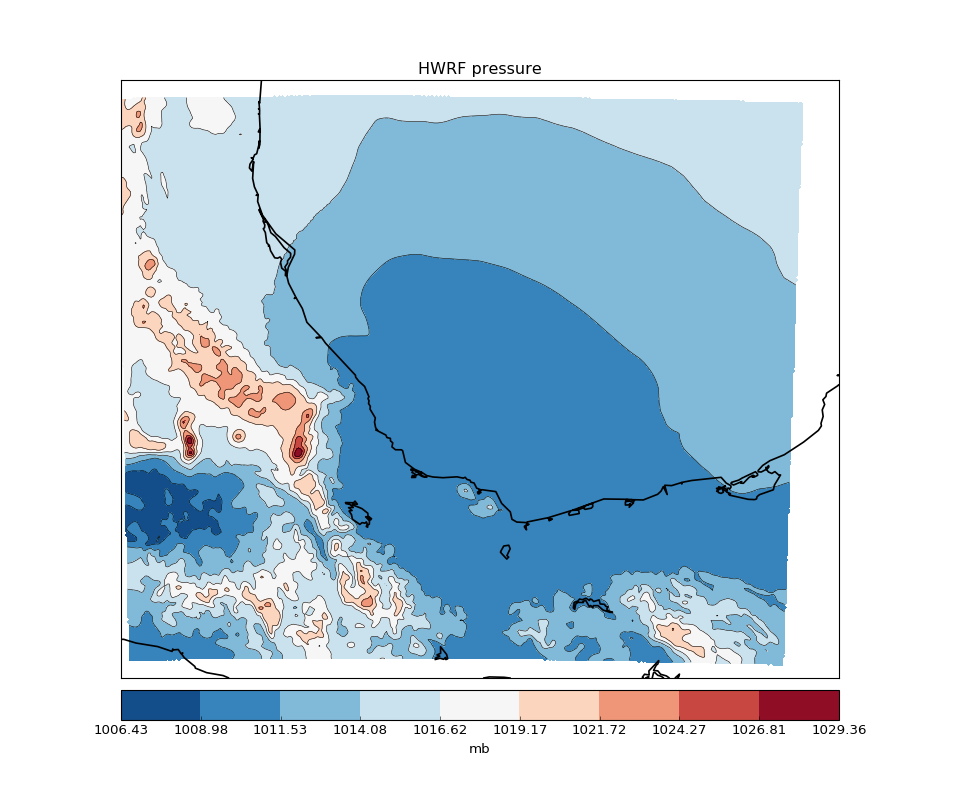

In [20]:
viewdata(slp,'mb','pressure')

<IPython.core.display.Javascript object>


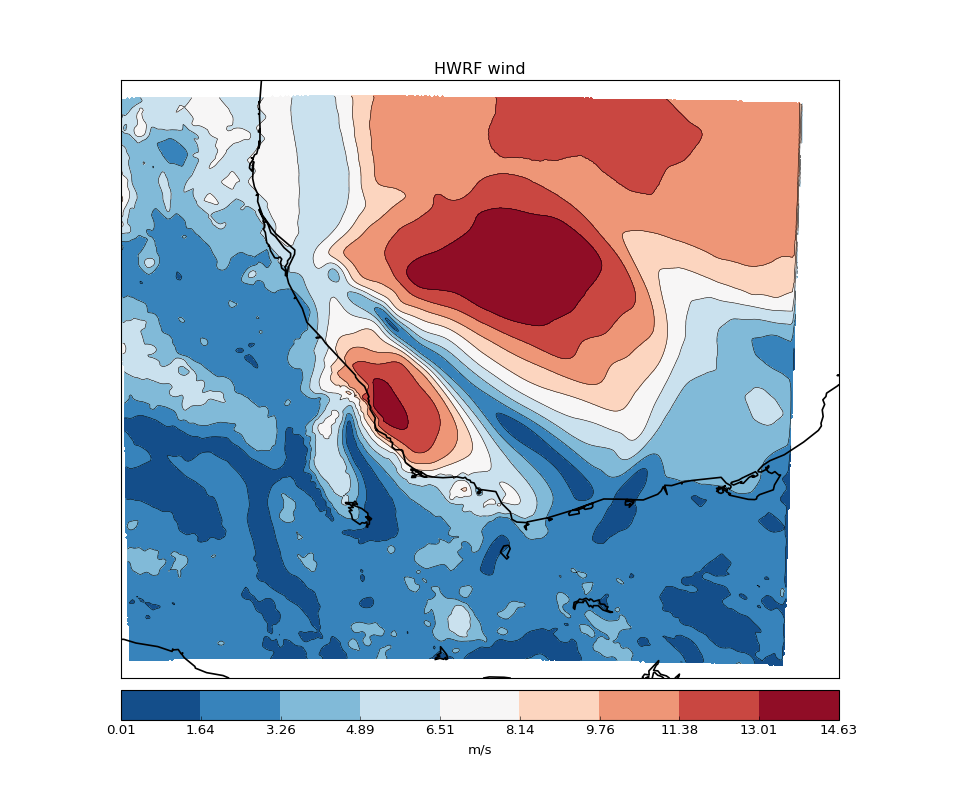

In [21]:
viewdata(wind,'m/s','wind')